# About NarsLKaggle_sub_17_Interaction_features
- This is the Jupyter notebook of the 17th model along the way.
- The prediction of this model produced the best score among all 19 models.
- This model begins with loading data from **df_train_sub9.csv'**
    - Columns have been lower cased and renamed. 
    - All the numeric fields and interaction features with .isnull() have been replaced with 0s along the way.
    - The feature selected in this model are those with correction above 0.55.
    - The neighborhood filed is dummied and included in the feature list.
    - It also includes a new field called nb_ranking:
        - NB_ranking is a manually assigned numeric field
        - The number assigned is based on the highest and lowest price range of the neighborhood.
        - By adding this field, the intention is to use this field with other fields to examine the interaction between location, square footage, and house quality.
- In this model, there is a list of interact features added to the dataset from earlier models, including:
    - df['fbxgrla'] = df['full_bath'] * df['gr_liv_area']
    - df['frxgrla'] = df['fireplaces'] * df['gr_liv_area']
    - df['ovqxgla'] = df['overall_qual'] * df['gr_liv_area']
    - df['ovqxnbr'] = df['overall_qual'] * df['nb_ranking']
    - df['carsxara'] = df['garage_cars'] * df['garage_area']
- There is no polynomial, StandardScaler, and Statesmodel utilized in this one but in model 16.
    - The observation is that since most of the features included are square footage related, it doesn't produce a big difference between data points and hence, no noticeable difference between scaled and not scaled models.
---
- Score:
    - On training data: 0.8678641723393647
    - On Validation data: 0.8373181865008811
    - Based on the score, this model is sligtly over fitting.
        - Sub17 is a almost duplicate of sub10th, only dummified neighborhoods were not in sub10th but sub 17th. 
        - After sub10th, I tried to drop a few features but it all resulted in worse scores. 

- Check LINEM Assumption of the model:
    - L - Linear relationship
        - The features included in this model are those with strong linear relationship with the target
        - See the scattler plot below 
    - I - Independent errors
        - This is assumed
    - N - Normally distributed errors
        - Not perfectly normal distribution but within acceptable range
           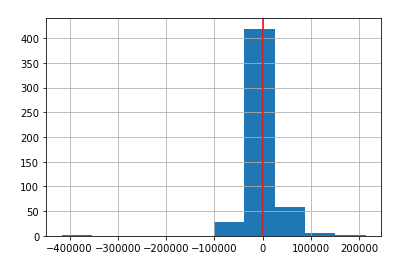
        
    - E - Equal variance of errors (homoscedasticity)
    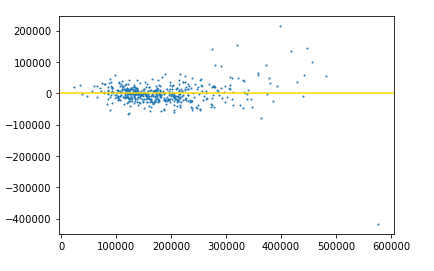    
    
    - M - No Multicollinearity/Independence of Predictors
        - From a Statesmodel result.summary, it rules out the Multicolinearity between features. 
        - The P>|t| scores are 0. 
        - If there are dependency between feaures, the P>|t| will split between features.
    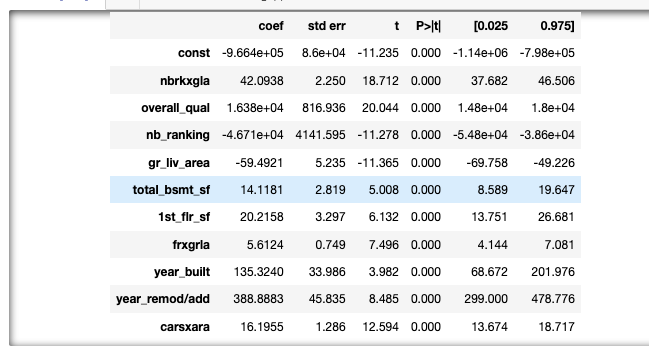
    
---
- If there are more time to work on the project:
    - I would like to perform more outside research to explore other non-numeric fields to see how to trun those fields into predictors. 
    - I would like to play with sub16 more to perform better feature selection among the plonomial features. 

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 120
pd.options.display.max_rows = 3000

# Loading data

In [2]:
df = pd.read_csv('../project_2/Processed_data/df_train_sub9.csv')

FileNotFoundError: [Errno 2] File ../project_2/Processed_data/df_train_sub9.csv does not exist: '../project_2/Processed_data/df_train_sub9.csv'

In [ ]:
df.head(2)

In [ ]:
df.shape

# Handle null values

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.describe()

df['fbxgrla'] = df['full_bath'] * df['gr_liv_area']

df['frxgrla'] = df['fireplaces'] * df['gr_liv_area']

df.shape

# Clean-up and EDA

In [ ]:
# sns.heatmap(df.corr()[['bpm']].sort_values('bpm'), annot = True)
plt.figure(figsize = (15, 25))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot = True);

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['bsmtfin_sf_2','bsmt_half_bath', 'central_air', 'enclosed_porch', 'kitchen_abvgr'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['nbrkxgla','overall_qual', 'nb_ranking', 'gr_liv_area', 'fbxgrla'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['year_built', 'total_bsmt_sf','1st_flr_sf', 'totrms_abvgrd', 'total_bsmt_sf'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['frxgrla', 'carsxara', 'fbxgrla'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['garage_cars', 'garage_area', 'fireplaces','full_bath'])

nb_dum_list = ['neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
               'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
               'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
               'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill', 
               'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
               'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
               'neighborhood_StoneBr', 'neighborhood_Timber','neighborhood_Veenker']

nb_name = []
for nb in nb_dum_list:
    nb.split('_')[1]
    nb_name.append(nb.split('_')[1])

nb_name

df['nb_ranking'] = df['neighborhood'].map({'Blueste':1.6, 'BrDale':1, 'BrkSide': 1.35, 'ClearCr': 2.35,
                                          'CollgCr':2.5, 'Crawfor':2.5, 'Edwards': 1.7, 'Gilbert': 2.1,
                                           'Greens': 1.95, 'GrnHill':3, 'IDOTRR':1.05, 'Landmrk':1.5,
                                           'MeadowV':1.25, 'Mitchel':1.45, 'NAmes':1.9, 'NPkVill':1.35,
                                           'NWAmes':2.05, 'NoRidge':3.4, 'NridgHt':2.7, 'OldTown':1.85,
                                           'SWISU':1.45, 'Sawyer':1.4, 'SawyerW':2, 'Somerst':2.15,
                                           'StoneBr':3.6, 'Timber':2.85, 'Veenker':2.6, 'Blmngtn':2.1})

df['nb_ranking'].sort_values().value_counts()

In [ ]:
df['carsxara'] = df['garage_cars'] * df['garage_area']

In [ ]:
df['ovqxgla'] = df['overall_qual'] * df['gr_liv_area']

In [ ]:
df['ovqxnbr'] = df['overall_qual'] * df['nb_ranking']

df['nbrkxgla'].isnull().sum()

df[df['nbrkxgla'].isnull()]

df.shape

df.head(3)

<font size=3 color= green><b>The following three lines of code are for neighborhood reviewing.</b></font>

sns.pairplot(df, y_vars=['saleprice'], x_vars=['neighborhood_BrkSide'])

sns.pairplot(df, y_vars=['saleprice'], x_vars=['neighborhood_Timber',
 'neighborhood_Veenker'])

df['garage_finish'].describe()

In [ ]:
df['carsxara'].value_counts()

In [ ]:
df[df['carsxara'].isnull()]

In [ ]:
df['carsxara'] = df['carsxara'].replace(np.nan, 0)

<font size=3 color= green><b>The following three lines of code are for single column reviewing.</b></font>

- Should I drop df['garage_yr_blt'] == 0?
- drop df['mas_vnr_area'].isnull()? x22

df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(0)

df['bsmt_full_bath'].isnull().sum()

df['bsmt_full_bath'].describe()

df['full_bath'].value_counts()

In [ ]:
df.to_csv('df_train_sub10.csv', index = False)

# Define Feature Matrix & Target

In [ ]:
features = ['nbrkxgla','overall_qual', 'nb_ranking', 'gr_liv_area', 'fbxgrla', 'total_bsmt_sf',
            '1st_flr_sf', 'frxgrla', 'year_built', 'year_remod/add', 'totrms_abvgrd', 'carsxara', 
            'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
            'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
            'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
            'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill',
            'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
            'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
            'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker']

In [ ]:
df[features].isnull().sum()

In [ ]:
y = df['saleprice']
X = df[features]

#### Train-Test-Split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 308)

#### Instantiate, Fit, Score Model

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
cross_val_score(lr, X_train, y_train)

In [ ]:
cross_val_score(lr, X_train, y_train).mean()

In [ ]:
cross_val_score(lr, X_valid, y_valid)

In [ ]:
cross_val_score(lr, X_valid, y_valid).mean()

In [ ]:
lr.score(X_train, y_train), lr.score(X_valid, y_valid)

In [ ]:
list(zip(X.columns, lr.coef_))

In [ ]:
y_pred = lr.predict(X_valid)

In [ ]:
residuals = y_valid - y_pred

In [ ]:
residuals.hist()
plt.axvline(0, color='r')

In [ ]:
plt.scatter(y_pred, residuals, s=1)
plt.axhline(0, color = 'gold')

In [ ]:
plt.scatter(X, y, s=1)

# Prep df_test data

In [ ]:
df_test = pd.read_csv('../project_2/df_test_sub9.csv')

In [ ]:
df_test.shape

In [ ]:
df_test.describe()

df_test['carsxara'] = df_test['garage_cars'] * df_test['garage_area']

In [ ]:
df_test['ovqxgla'] = df_test['overall_qual'] * df_test['gr_liv_area']

In [ ]:
df_test['ovqxnbr'] = df_test['overall_qual'] * df_test['nb_ranking']

df_test['nb_ranking'] = df_test['neighborhood'].map({'Blueste':1.6, 'BrDale':1, 'BrkSide': 1.35, 'ClearCr': 2.35,
                                          'CollgCr':2.5, 'Crawfor':2.5, 'Edwards': 1.7, 'Gilbert': 2.1,
                                           'Greens': 1.95, 'GrnHill':3, 'IDOTRR':1.05, 'Landmrk':1.5,
                                           'MeadowV':1.25, 'Mitchel':1.45, 'NAmes':1.9, 'NPkVill':1.35,
                                           'NWAmes':2.05, 'NoRidge':3.4, 'NridgHt':2.7, 'OldTown':1.85,
                                           'SWISU':1.45, 'Sawyer':1.4, 'SawyerW':2, 'Somerst':2.15,
                                           'StoneBr':3.6, 'Timber':2.85, 'Veenker':2.6, 'Blmngtn':2.1})

df_test['nb_ranking'].sort_values().value_counts()

df_test['nbrkxgla'] = df_test['nb_ranking'] * df_test['gr_liv_area']

df_test['fbxgrla'] = df_test['full_bath'] * df_test['gr_liv_area']

df_test['frxgrla'] = df_test['fireplaces'] * df_test['gr_liv_area']

In [ ]:
df_test[features].isnull().sum()

In [ ]:
df_test.to_csv('df_test_sub10.csv', index = False)

In [ ]:
df_test.shape

#### Make sure there aren't any nulls in the columns we used in the model:

In [ ]:
df_test[features].isnull().sum()

In [ ]:
list(df_test.columns)

In [ ]:
X_TEST = df_test[features]

X_TEST_SC = ss.transform(X_TEST)

#### Create Predictions

In [ ]:
df_test['y_hat'] = lr.predict(X_TEST)

In [ ]:
df_test.head()

In [ ]:
df_test.shape

# Create Submission

In [ ]:
nars_submission = df_test[['id', 'y_hat']]

# View Correct Submission Format

In [ ]:
nars_submission.head()

In [ ]:
nars_submission.shape

# Rename columns of the submission

In [ ]:
nars_submission.rename(columns = {'id' : 'Id',
                                     'y_hat' : 'SalePrice'}, inplace = True)

In [ ]:
nars_submission.shape

In [ ]:
nars_submission.head()

#### Export as a CSV

In [ ]:
nars_submission.to_csv('nars_submission_17.csv', index = False)

## Standardscaler transform

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X)

In [ ]:
X_ss = ss.transform(X)

## Enable Statesmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X_ss, prepend=True)
    ## adding constant 1 
results = sm.OLS(y, X).fit()

In [ ]:
results.summary()